In [1]:
import numpy as np
import matplotlib.pyplot as plt

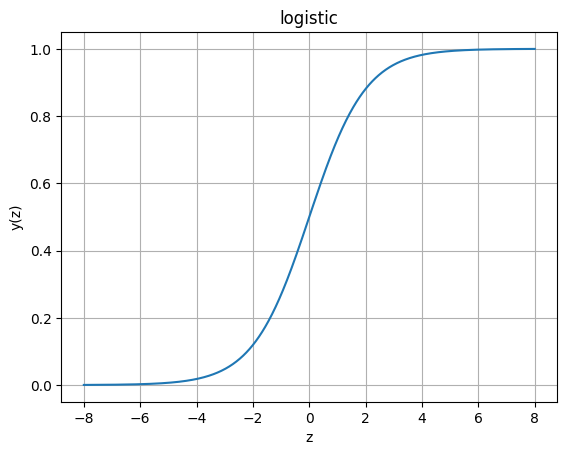

In [2]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

z = np.linspace(-8, 8, 1000)
y = sigmoid(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('logistic')
plt.grid()
plt.show()


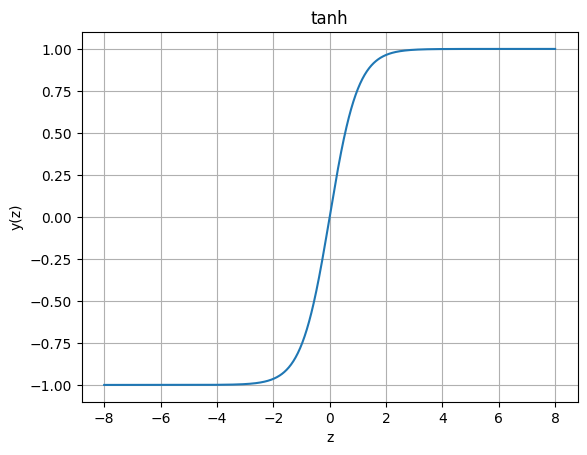

In [3]:
def tanh(z):
    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

z = np.linspace(-8, 8, 1000)
y = tanh(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('tanh')
plt.grid()
plt.show()


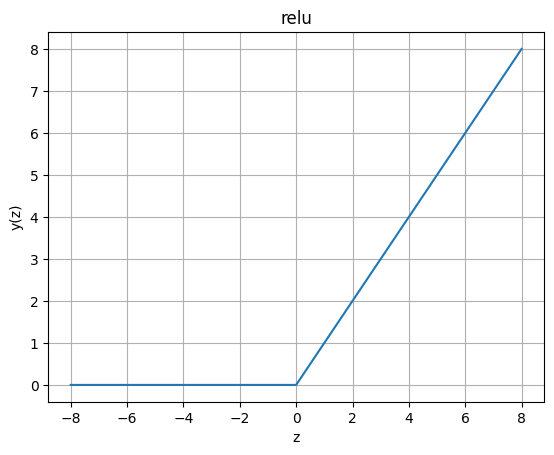

In [4]:
def relu(z):
    return np.maximum(np.zeros_like(z), z)


z = np.linspace(-8, 8, 1000)
y = relu(z)
plt.plot(z, y)
plt.xlabel('z')
plt.ylabel('y(z)')
plt.title('relu')
plt.grid()
plt.show()


# Building neural networks
Dataset
https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset

In [5]:
from sklearn import datasets
housing = datasets.fetch_california_housing()

In [6]:
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
housing.data

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [8]:
housing.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [9]:
housing.data.shape

(20640, 8)

In [10]:
num_test = 1000  # the last 10 samples as testing set

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

X_train = housing.data[:-num_test, :]
X_train = scaler.fit_transform(X_train)
y_train = housing.target[:-num_test].reshape(-1, 1)
X_test = housing.data[-num_test:, :]
X_test = scaler.transform(X_test)
y_test = housing.target[-num_test:]


## Implementing neural networks with scikit-learn
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

Multi-layer Perceptron regressor.

In [11]:
from sklearn.neural_network import MLPRegressor
net = MLPRegressor(hidden_layer_sizes=(16, 8),
                         activation='relu',
                         solver='adam',
                         learning_rate_init=0.001,
                         random_state=42,
                         max_iter=2000)

In [12]:
net.fit(X_train, y_train.ravel())  # ravel function to return the elements of the given Series object as an ndarray
predictions = net.predict(X_test)
print(predictions)


[1.29927123 0.74046306 1.18923031 1.97565715 1.40313159 1.39201942
 0.97626118 1.01730129 1.24537336 1.32102539 1.13209866 1.17381798
 0.60160805 0.72314844 0.60510869 0.88550544 0.77455213 0.97970931
 1.09472818 0.85883355 0.87106767 0.78229438 0.66576825 0.76480336
 1.30491674 1.71957565 1.62538478 1.57637387 1.33874167 1.12567181
 0.78791951 1.52827051 1.27191771 1.3107223  1.60035603 1.31674204
 1.02351953 1.18406851 0.92193153 0.84666016 0.84739935 0.86025768
 0.75013748 0.74075424 0.7195949  0.7574719  0.78282592 0.87432012
 0.71001877 0.76618733 1.22688948 0.7909341  0.72644977 0.72598843
 1.63693116 1.43022573 1.1597443  1.47276407 1.62931319 1.27349239
 1.75433273 1.15126339 1.62240286 1.30958146 1.09570284 1.27422466
 1.0689994  1.55333699 1.35374112 1.30707106 1.10022715 1.09219213
 1.83136569 1.22205758 0.64423784 0.80237988 0.86636411 0.78507628
 0.90009245 1.041539   1.31101307 0.89279995 0.86611053 0.87618615
 0.74814977 0.76260625 0.9857971  0.99981077 0.92480659 1.2868

In [13]:
net.score(X_train, y_train.ravel())

0.7881879221908636

In [14]:
net.score(X_test, y_test)

0.7207569145420675

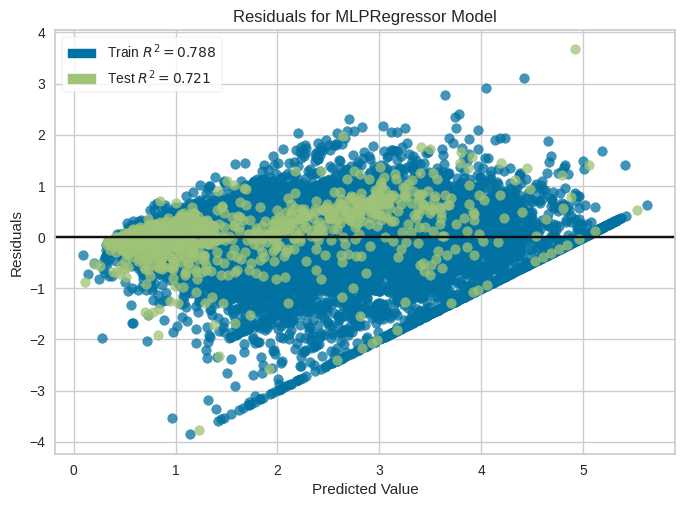

<Axes: title={'center': 'Residuals for MLPRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(net, hist=False)

visualizer.fit(X_train, y_train.ravel())  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

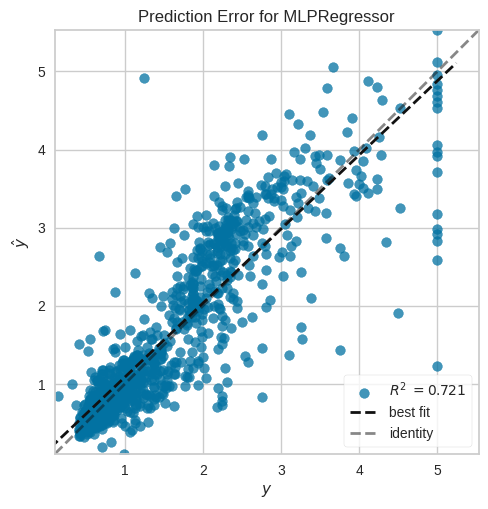

<Axes: title={'center': 'Prediction Error for MLPRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [16]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(net)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

## Implementing neural networks with TensorFlow

### Keras
Keras (https://www.tensorflow.org/guide/keras) is one of the most popular and easy-to-use
neural network libraries and is written in Python. It was written with ease of use in mind and
provides the fastest way to implement deep learning.

Keras needs a lower-level deep learning library to perform tensor-level manipulations. This foundational
layer is referred to as the “backend engine.”

Possible backend engines for Keras include the following:
* TensorFlow (www.tensorflow.org): This is the most popular framework of its kind and
is open sourced by Google.
* Theano: This was developed at the MILA lab at Université de Montréal.
* Microsoft Cognitive Toolkit (CNTK) (https://learn.microsoft.com/en-us/cognitivetoolkit/):
This was developed by Microsoft.

The advantage of this modular deep learning architecture is that the backend of Keras can be
changed without rewriting any code.


For neural networks, the important hyperparameters
are these:
* The activation function
* The learning rate
* The number of hidden layers
* The number of neurons in each hidden layer


There are three steps involved in defining a complete Keras model:
1. Define the layers
2. Define the learning process
3. Test the model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

tf.random.set_seed(42)


2025-01-30 19:10:51.457972: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-30 19:10:51.458707: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-30 19:10:51.463506: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-30 19:10:51.475342: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738260651.496386    8596 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738260651.50

In [18]:
model = keras.Sequential([
    keras.layers.Dense(units=16, activation='relu'),
    keras.layers.Dense(units=8, activation='relu'),
    keras.layers.Dense(units=1)
])


In [19]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.01))


W0000 00:00:1738260653.519090    8596 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [20]:
model.fit(X_train, y_train, epochs=300)


Epoch 1/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 1.0946
Epoch 2/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4168
Epoch 3/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3763
Epoch 4/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3598
Epoch 5/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3462
Epoch 6/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3399
Epoch 7/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3343
Epoch 8/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3324
Epoch 9/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3271
Epoch 10/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3212
Epoch 11/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3162
Epoch 12/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3168
Epoch 13/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3099
Epoch 14/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3080
Epoch 15/300
614/614 ━━━━━━━━━━━━━━━━━━━━ 1

In [21]:
predictions = model.predict(X_test)[:, 0]
#print(predictions)

print(mean_squared_error(y_test, predictions))

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


NameError: name 'mean_squared_error' is not defined

In [63]:
from sklearn.metrics import r2_score
r2_score(y_test,predictions)

0.769101359296588

# Example

In [ ]:
x1=c(0,1,0,1)
x2=c(0,0,1,1)
y=c(-1,1,1,-1)
xor=data.frame(x1,x2,y=y)
xor

In [ ]:
plot(x=x1,y=x2, pch=y+16, cex=2.5,xlim=c(-0.5, 1.5),ylim=c(-0.5, 1.5))

In [ ]:
library("neuralnet")
set.seed(123)
model1=neuralnet(y~ x1+x2,data = xor, hidden=1)
plot(model1)

![](../images/nnxor.jpeg)

In [ ]:
set.seed(123)
model22=neuralnet(y~ x1+x2,data = xor, hidden=2)
plot(model22)

![](../images/nnxor2.jpeg)

Compare errors. It is easy to see that in the case of xor, adding one perceptron caused a decrease in the error value and at the same time gives us the optimal solution.